In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

In [100]:
N = 100
numberofpartilce = 1
pos = np.random.uniform(0,N,(numberofpartilce,2))
x = np.linspace(0,N, N+1)
y = np.linspace(0,N, N+1)

x_grid, y_grid = np.meshgrid(x,y)
x = pos[:,0]
y = pos[:,1]


density = np.zeros([N+1,N+1])
for n in range(numberofpartilce):
    i = int(x[n])
    j = int(y[n])
    density[i, j] += (i+1-x[n])*(j+1-y[n])
    density[i+1, j] += (x[n]-i)*(j+1-y[n])
    density[i, j+1] += (i+1-x[n])*(y[n]-j)
    density[i+1, j+1] += (x[n]-i)*(y[n]-j)
density = np.transpose(density)

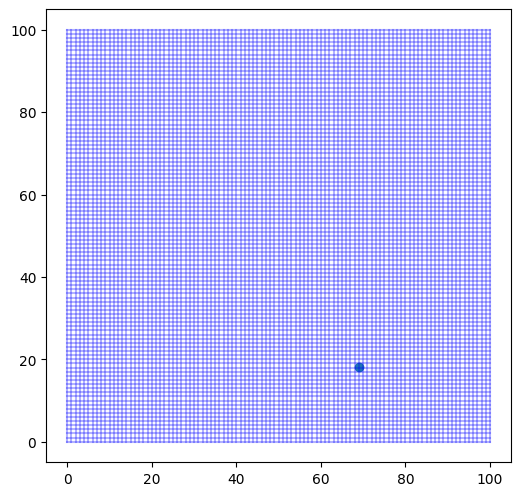

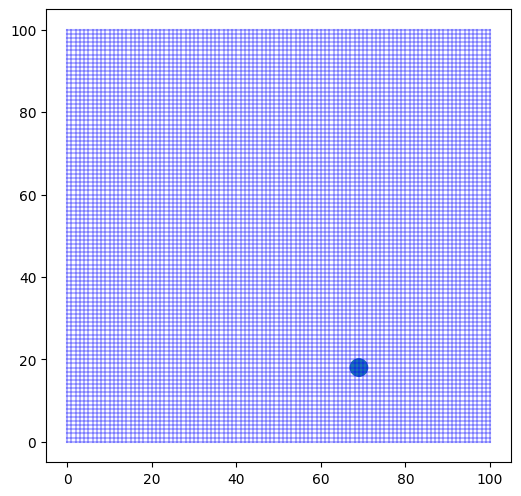

In [101]:
plt.figure(figsize=(6, 6), dpi=100)
plt.plot(x_grid, y_grid, c='b', alpha=0.3)
plt.plot(y_grid, x_grid, c='b', alpha=0.3)
plt.scatter(pos[:, 0], pos[:, 1])
plt.show()

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(x_grid,y_grid, c='b', alpha=0.3)
plt.plot(y_grid,x_grid, c='b', alpha=0.3)
plt.scatter(x_grid,y_grid, s= density*200)
plt.show()


In [102]:
numberOfgridcell = N+1
def poissonSolver(density, numberOfgridcell):
    Nx = numberOfgridcell+1
    Ddiag = -4 * np.eye(Nx - 1)
    Dupper = np.diag([1] * (Nx - 2), 1)
    Dlower = np.diag([1] * (Nx - 2), -1)
    D = Ddiag + Dupper + Dlower
    Ds = [D] * (Nx - 1)
    A = block_diag(*Ds)
    I = np.ones((Nx - 1) * (Nx - 2))
    Iupper = np.diag(I, Nx - 1)
    Ilower = np.diag(I, -Nx + 1)
    A += Iupper + Ilower
    B = density.flatten()

    phi = np.linalg.solve(A, B)
    phi = phi.reshape(
        numberOfgridcell, numberOfgridcell)
    return phi

phi = poissonSolver(density, numberOfgridcell)

In [109]:
def elctricfieldsolver(phi, numberOfgridcell):
    electricfield_x = np.zeros([numberOfgridcell, numberOfgridcell])
    electricfield_y = np.zeros([numberOfgridcell, numberOfgridcell])

    for i in range(numberOfgridcell):
        for j in range(1, numberOfgridcell-1):
            electricfield_x[i, j] = (phi[i, j+1] - phi[i, j-1])/2
        electricfield_x[i, 0] = (phi[i, 1] - phi[i, 0])
        electricfield_x[i, -1] = (phi[i, -1] - phi[i, -2])

    for j in range(numberOfgridcell):
        for i in range(1, numberOfgridcell-1):
            electricfield_y[i, j] = (phi[i+1, j] - phi[i-1, j])/2
        electricfield_y[0, j] = (phi[1, j] - phi[0, j])
        electricfield_y[-1, j] = (phi[-1, j] - phi[-2, j])

    return electricfield_x, electricfield_y
electricfield_x, electricfield_y = elctricfieldsolver(phi, numberOfgridcell)

In [107]:
# Periodic Boundary

def elctricfieldsolver(phi, numberOfgridcell):
    electricfield_x = np.zeros([numberOfgridcell, numberOfgridcell])
    electricfield_y = np.zeros([numberOfgridcell, numberOfgridcell])

    for i in range(numberOfgridcell):
        for j in range(1, numberOfgridcell-1):
            electricfield_x[i, j] = (phi[i, j+1] - phi[i, j-1])/2
        electricfield_x[i, 0] = ((phi[i, 1] - phi[i, -1]))/2
        electricfield_x[i, -1] = ((phi[i, 0] - phi[i, -1]))/2

    for j in range(numberOfgridcell):
        for i in range(1, numberOfgridcell-1):
            electricfield_y[i, j] = (phi[i+1, j] - phi[i-1, j])/2
        electricfield_y[0, j] = (phi[1, j] - phi[0, j])
        electricfield_y[-1, j] = (phi[-1, j] - phi[-2, j])

    return electricfield_x, electricfield_y
electricfield_x, electricfield_y = elctricfieldsolver(phi, numberOfgridcell)

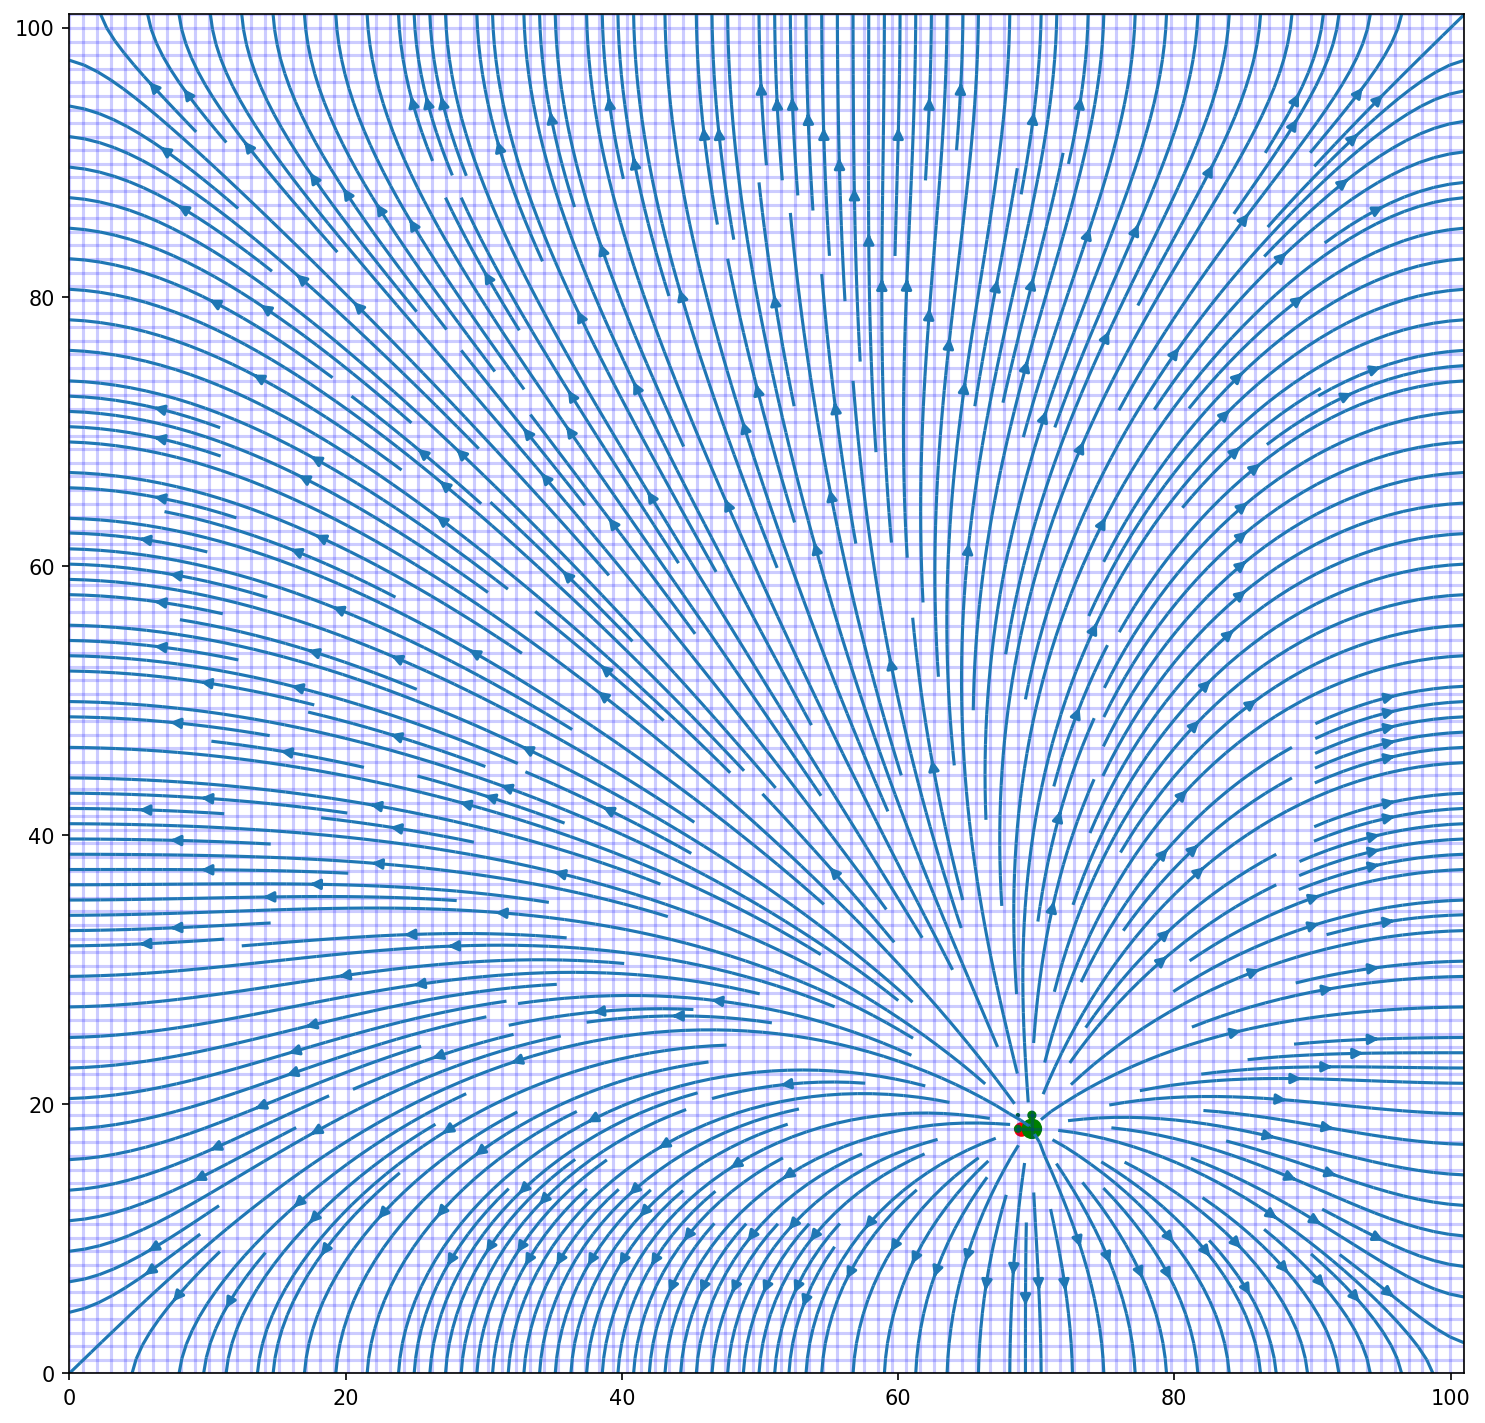

In [110]:
def plotElectricField(electricfield_x, electricfield_y, numberOfgridcell, gridSize, d=1):

    # numberOfgridcell = numberOfgridcell
    x = np.linspace(0, numberOfgridcell*gridSize, numberOfgridcell)
    y = np.linspace(0, numberOfgridcell*gridSize, numberOfgridcell)
    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(12, 12), dpi=150)
    # plt.scatter(x_grid, y_grid, c='blue')
    plt.plot(x_grid, y_grid, c='b', alpha=0.2)
    plt.plot(y_grid, x_grid, c='b', alpha=0.2)
    plt.streamplot(x, y, electricfield_x, electricfield_y, density=d)
    plt.scatter(pos[:, 0], pos[:, 1], c='red')
    # plt.ylim(numberOfgridcell+1 + 0.5, -0.5)
    plt.scatter(x_grid,y_grid, s= density*100, c='green')
    plt.show()

plotElectricField(electricfield_x, electricfield_y, numberOfgridcell, 1, d=3)


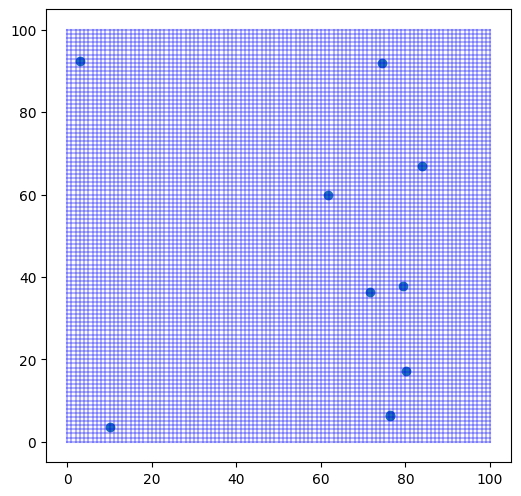

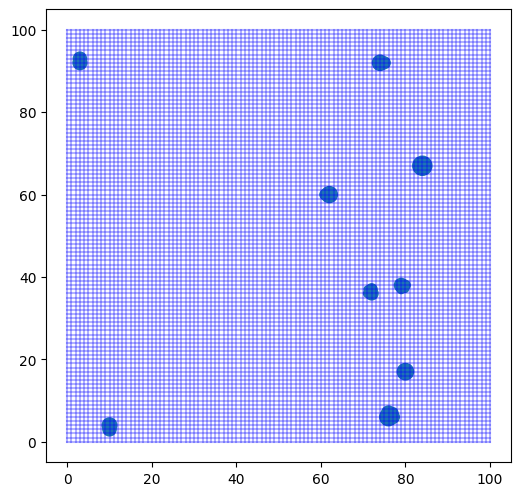

In [99]:
plt.figure(figsize=(6, 6), dpi=100)
plt.plot(x_grid, y_grid, c='b', alpha=0.3)
plt.plot(y_grid, x_grid, c='b', alpha=0.3)
plt.scatter(pos[:, 0], pos[:, 1])
plt.show()

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(x_grid,y_grid, c='b', alpha=0.3)
plt.plot(y_grid,x_grid, c='b', alpha=0.3)
plt.scatter(x_grid,y_grid, s= density*200)
plt.show()